# Tutorial
## https://www.youtube.com/watch?v=fyZ9Rxpoz2I&ab_channel=DigitalSreeni


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from PIL import Image



In [2]:
df = pd.read_csv('input/HAM10000_metadata.csv', delimiter=',')
df.dataframeName = 'HAM10000_metadata.csv'

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['dx'])
LabelEncoder()
print(list(label_encoder.classes_))

df['label'] = label_encoder.transform(df["dx"])
print(df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
2614  HAM_0002334  ISIC_0027786  bcc      histo  55.0    male   
1248  HAM_0001726  ISIC_0024367  mel      histo  35.0  female   
7334  HAM_0002574  ISIC_0033157   nv      histo  55.0    male   
6514  HAM_0002081  ISIC_0029120   nv  follow_up  70.0    male   
8127  HAM_0001452  ISIC_0026402   nv      histo  25.0  female   
5118  HAM_0006963  ISIC_0032351   nv  follow_up  55.0    male   
560   HAM_0006240  ISIC_0030188  bkl      histo  80.0    male   
6559  HAM_0004812  ISIC_0025682   nv  follow_up  35.0  female   
2909  HAM_0003941  ISIC_0028419  bcc      histo  35.0    male   
4547  HAM_0003074  ISIC_0029816   nv  follow_up  35.0    male   

         localization  label  
2614             back      1  
1248             back      4  
7334            chest      5  
6514            trunk      5  
8127  lower extremity      5  
5118            trunk      5  
560   upper extr

# features to label
akiex -> 0
bcc -> 1
bkl -> 2
df -> 3
mel -> 4
nv -> 5
vasc -> 6

In [4]:
df_L0 = df[df['label']==0]
df_L1 = df[df['label']==1]
df_L2 = df[df['label']==2]
df_L3 = df[df['label']==3]
df_L4 = df[df['label']==4]
df_L5 = df[df['label']==5]
df_L6 = df[df['label']==6]

n = 500
from sklearn.utils import resample
df_L0_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L1_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L2_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L3_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L4_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L5_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)
df_L6_balance = resample(df_L0,replace=True, n_samples=n, random_state=42)

combine into one df

In [5]:
df_balance = pd.concat([df_L0_balance,df_L2_balance,df_L3_balance,
                        df_L4_balance,df_L5_balance,df_L6_balance])
print(df_balance['label'].value_counts())

0    3000
Name: label, dtype: int64


In [6]:
#TODO try to assign weight instead of balancing data

In [34]:
from glob import glob
image_size = 64
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join('input/','*','*.jpg'))}
df_balance['path'] = df['image_id'].map(image_path.get)
df_balance['image'] = df_balance['path'].map(lambda path:Image.open(path).resize((image_size,image_size)))

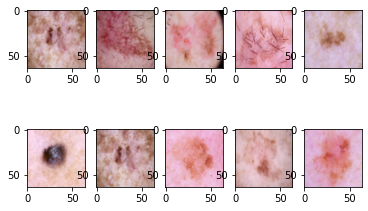

In [40]:
#print some image
index = 1
for image in df_balance['image'].head(10):
    plots = plt.subplot(2,5,index)
    plots.imshow(image)
    index+=1

In [42]:
#to array
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

data = np.asarray(df_balance['image'].to_list())
data = data/255 #scale the value from [0...1]
label = df_balance['label']
label_cat = to_categorical(label,num_classes=7)

train_data,test_data,train_label,test_label = train_test_split(data,label_cat,test_size=0.25,random_state=999)


In [ ]:
#setup model